### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Jan 24 08:04:52 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR API KEY")
project = rf.workspace("jannat-javed-nqvnt").project("naruto-hand-seals")
version = project.version(1)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Naruto-Hand-Seals-1 in yolov11:: 100%|██████████| 3444/3444 [00:00<00:00, 3963.92it/s]


## Custom Training

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 380MB/s]
New https://pypi.org/project/ultralytics/8.3.66 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Naruto-Hand-Seals-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, 

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1737705968.bc2b18b252fb.1035.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1485.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1486.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1487.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


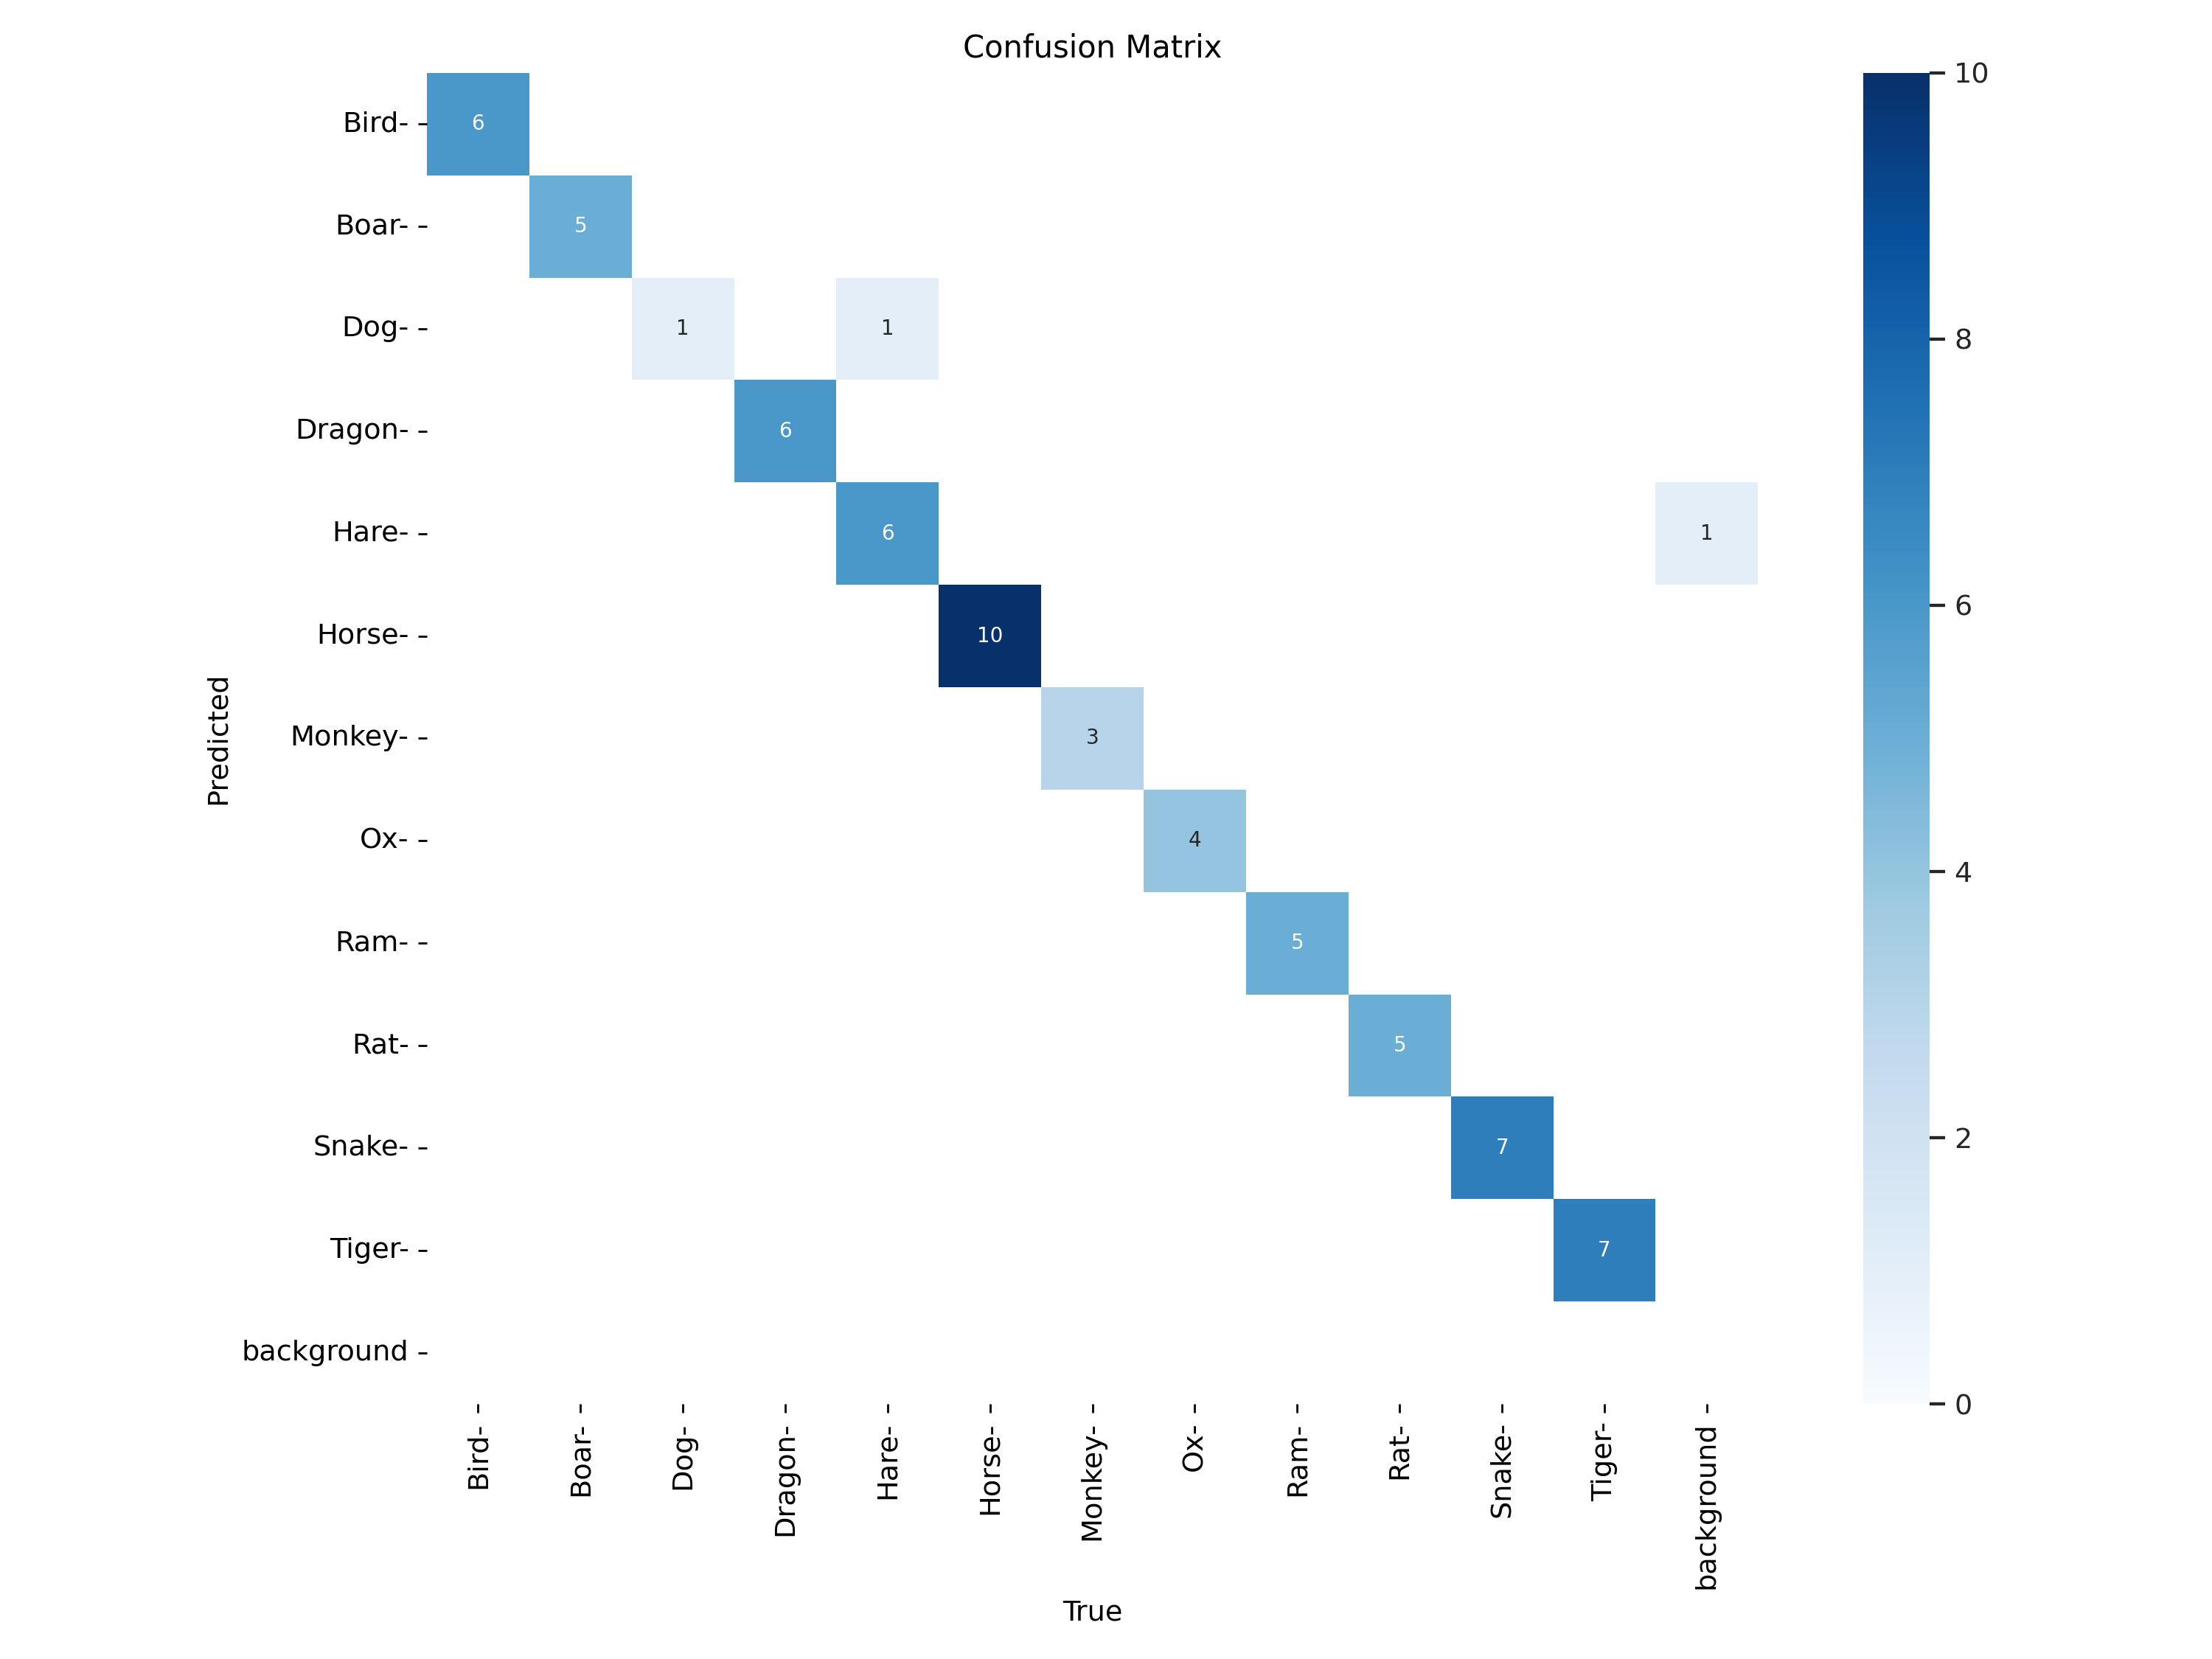

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

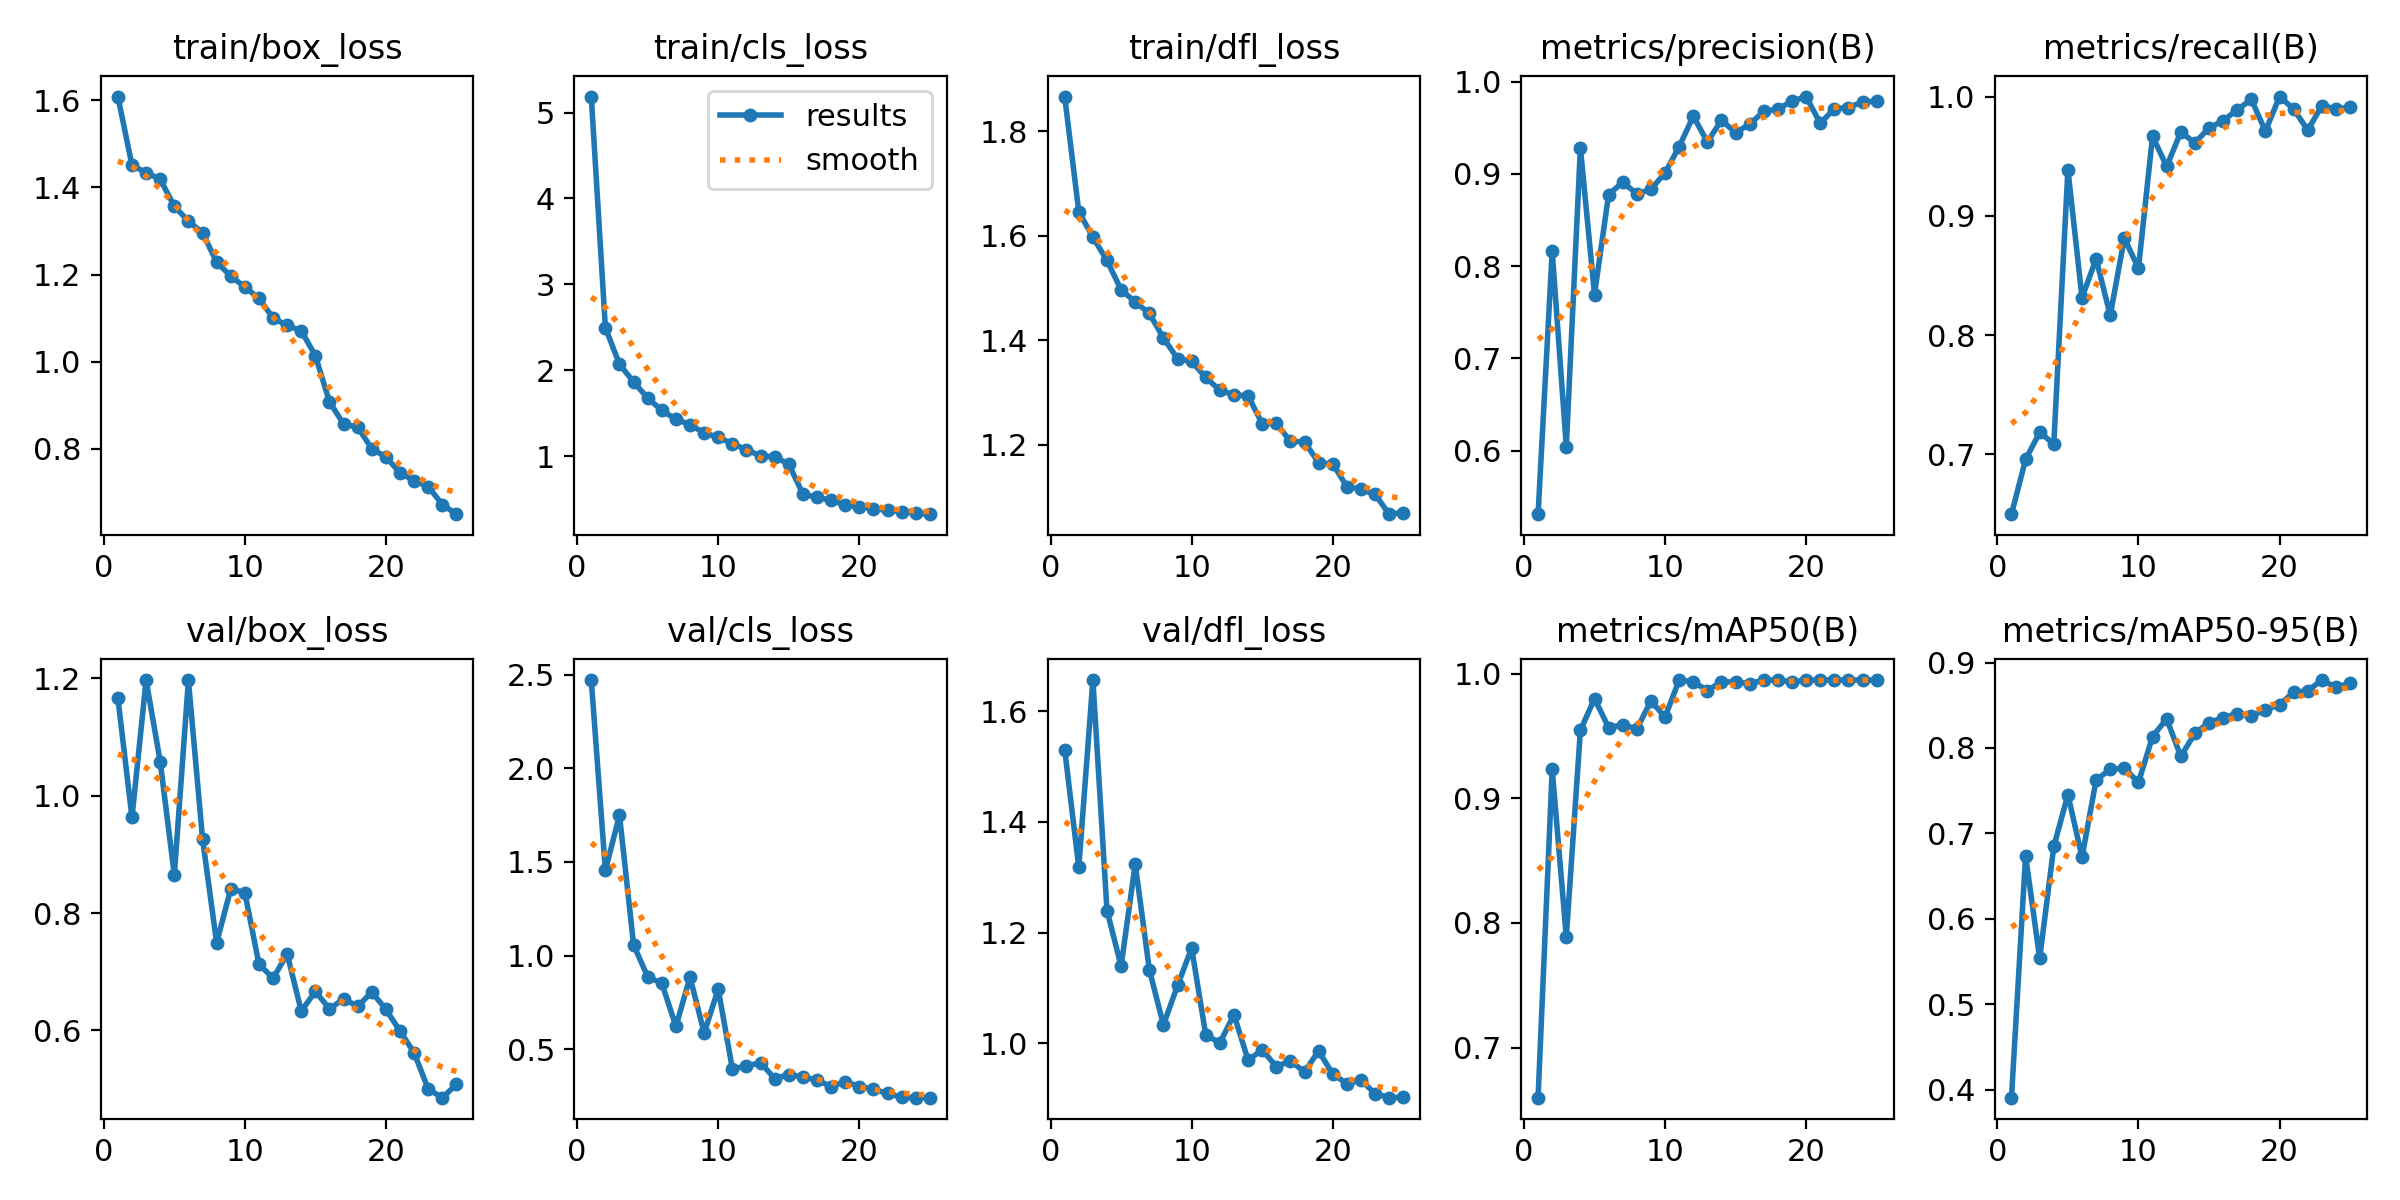

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

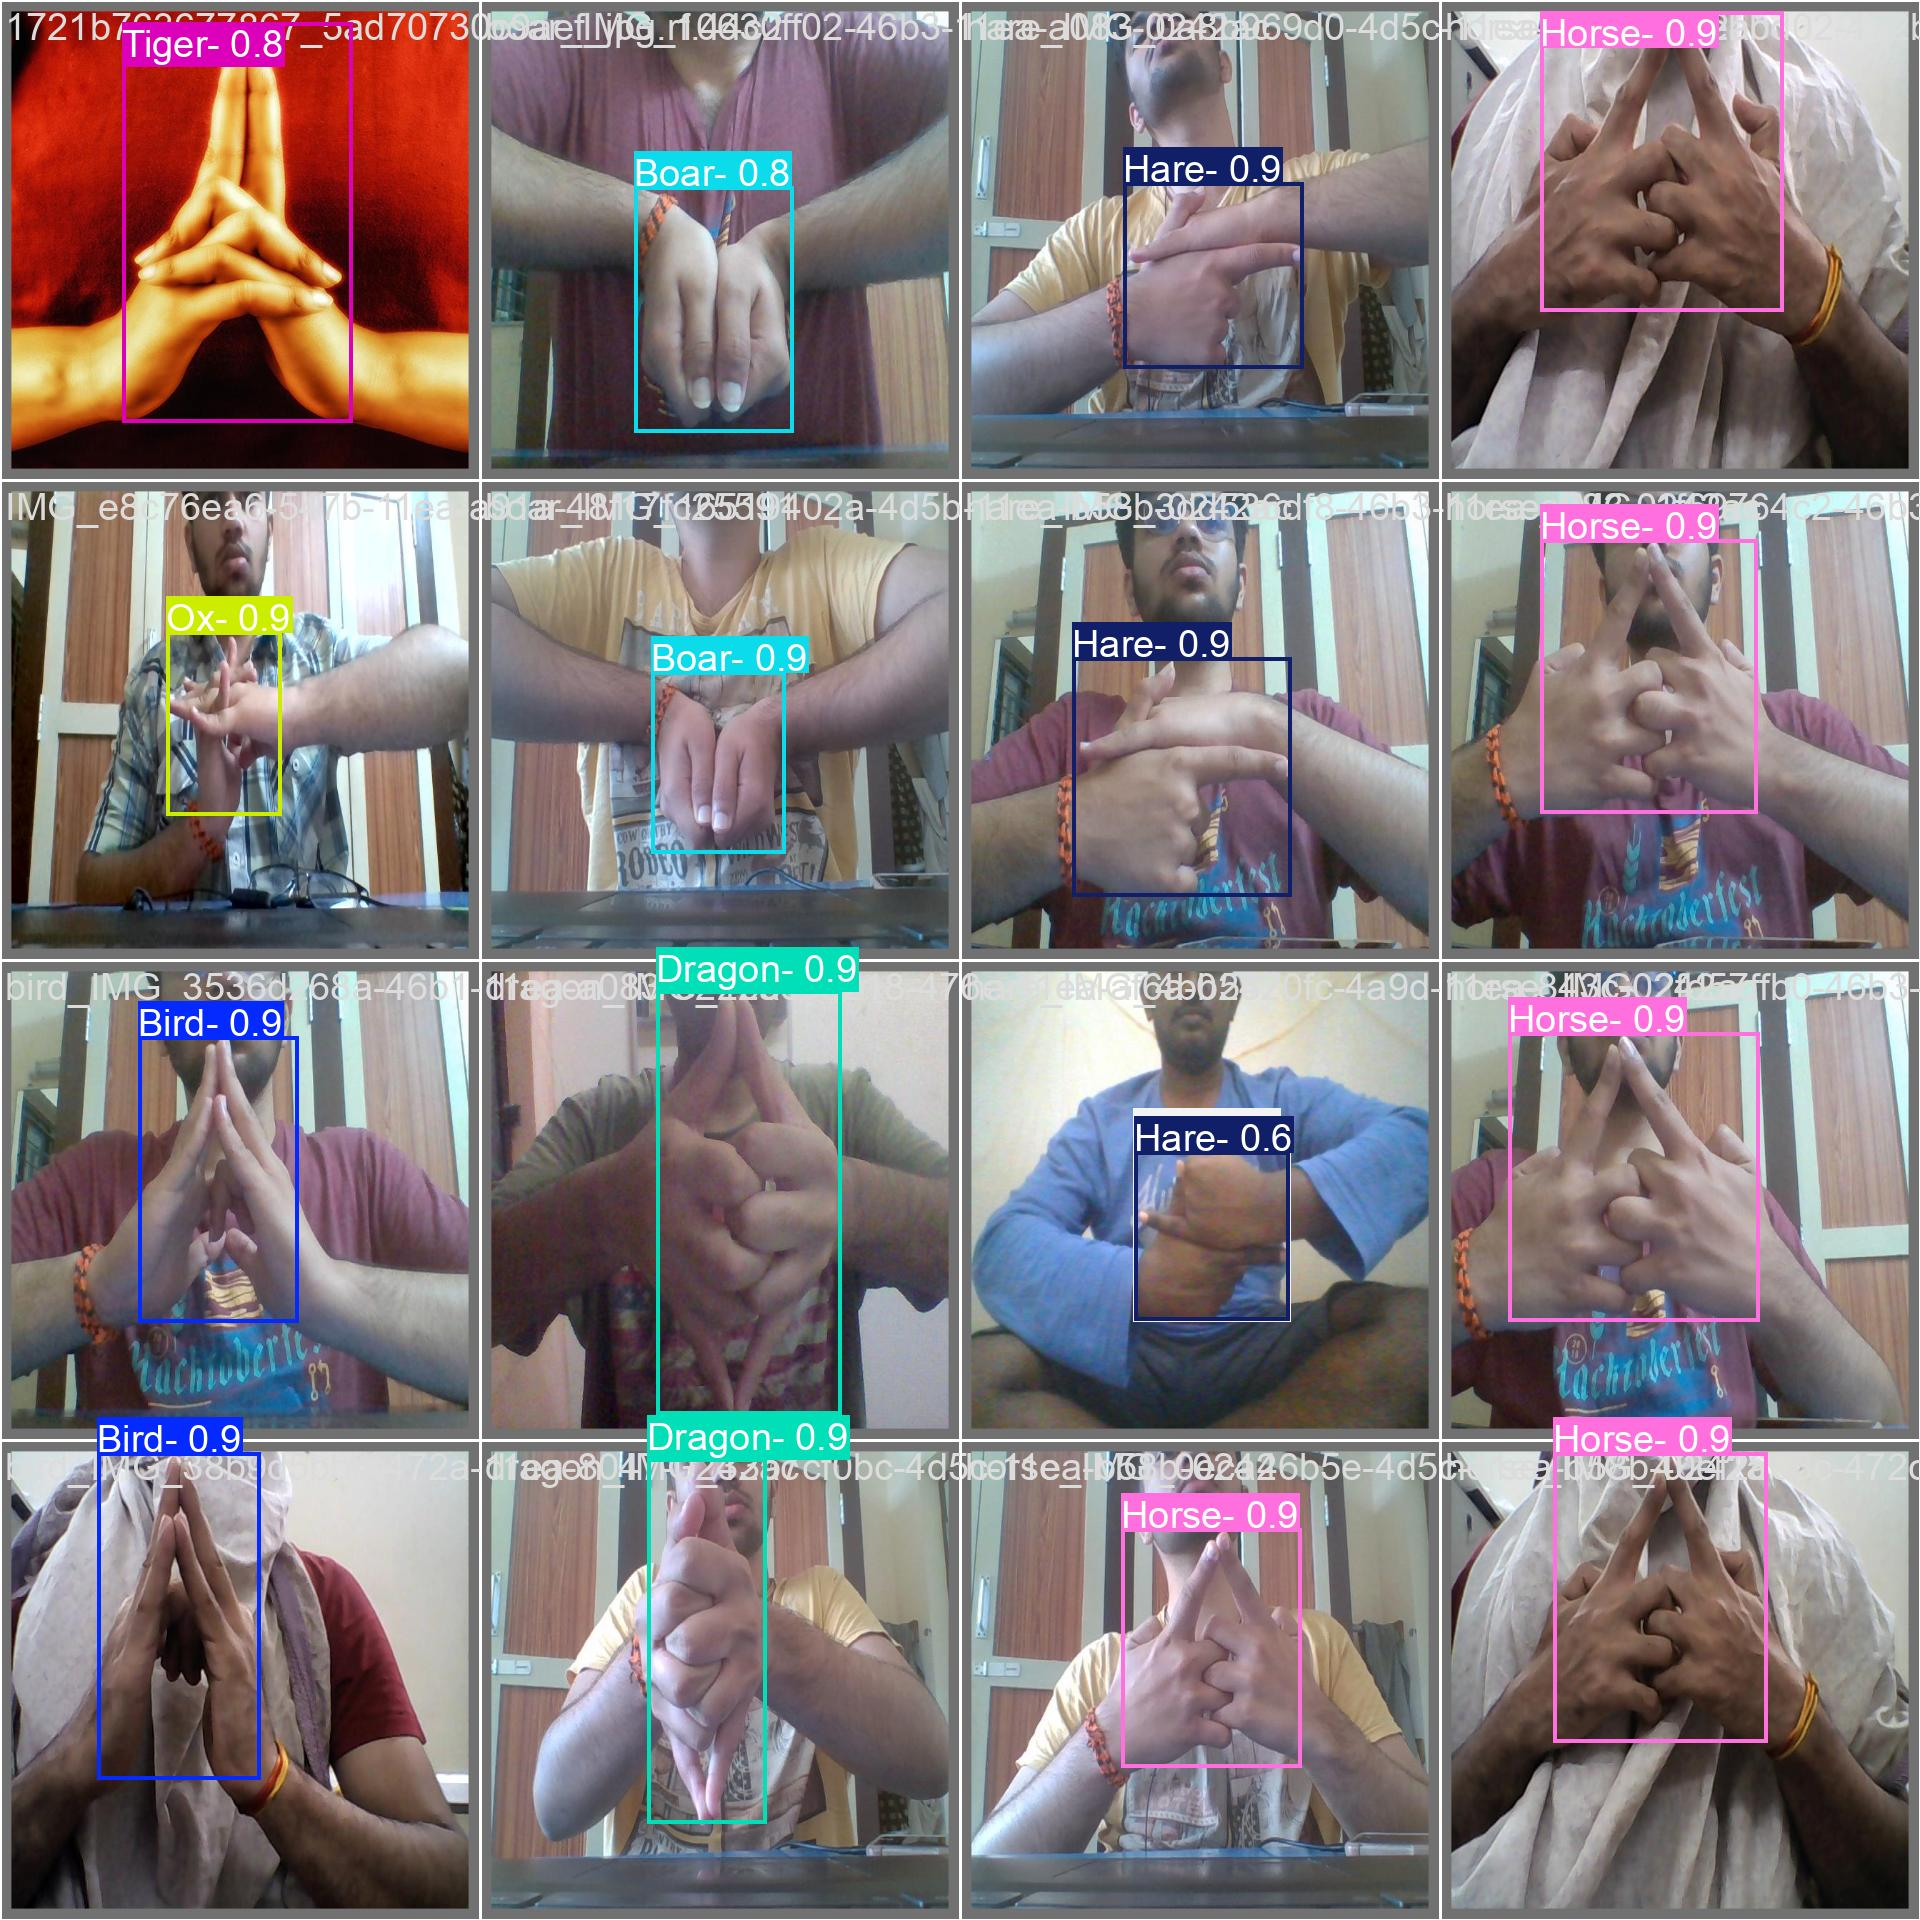

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,417,444 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Naruto-Hand-Seals-1/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100% 66/66 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.35it/s]
                   all         66         66      0.972      0.992      0.995      0.877
                 Bird-          6          6      0.989          1      0.995      0.915
                 Boar-          5          5      0.991          1      0.995      0.824
                  Dog-          1          1      0.797          1      0.995      0.895
               Dragon-          6          6      0.989          1      0.995      0.873
                 Hare-          7          7          1      0.908      0.995      0.929
                Horse-         10    

## Inference with custom model

In [11]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,417,444 parameters, 0 gradients, 21.3 GFLOPs

image 1/66 /content/datasets/Naruto-Hand-Seals-1/test/images/BB1o43v5_jpeg.rf.7763c5a03dd6631ea9c525a0e5b181d6.jpg: 640x640 1 Ram-, 1 Rat-, 15.6ms
image 2/66 /content/datasets/Naruto-Hand-Seals-1/test/images/IMG_e842810c-547b-11ea-ac90-48f17fc25591_png.rf.698178206c802d9797694cff5745acda.jpg: 640x640 1 Ox-, 15.7ms
image 3/66 /content/datasets/Naruto-Hand-Seals-1/test/images/IMG_e8431cde-547b-11ea-a257-48f17fc25591_png.rf.4112504bbba1dd4828134d30531ff9af.jpg: 640x640 1 Monkey-, 15.6ms
image 4/66 /content/datasets/Naruto-Hand-Seals-1/test/images/IMG_e843c4d5-547b-11ea-b840-48f17fc25591_png.rf.7999a8e62c85578690941eb1706004fb.jpg: 640x640 1 Dog-, 15.6ms
image 5/66 /content/datasets/Naruto-Hand-Seals-1/test/images/IMG_e8465b31-547b-11ea-9e69-48f17fc25591_png.rf.57b6624c963871a1c44e107a832c5c72.jpg: 640x640 1 Dog-, 15.6ms
imag

**NOTE:** Let's take a look at few results.

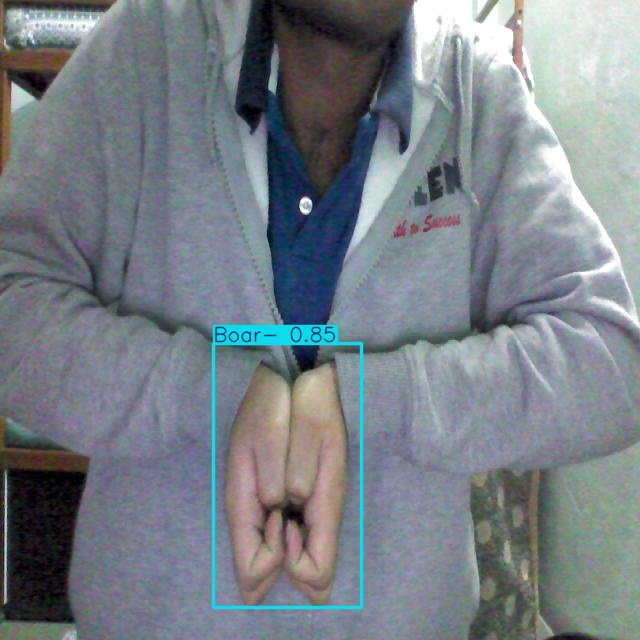

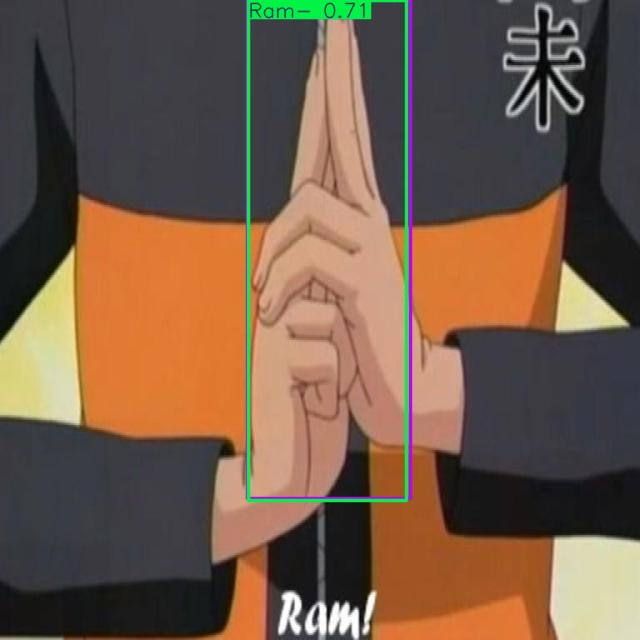

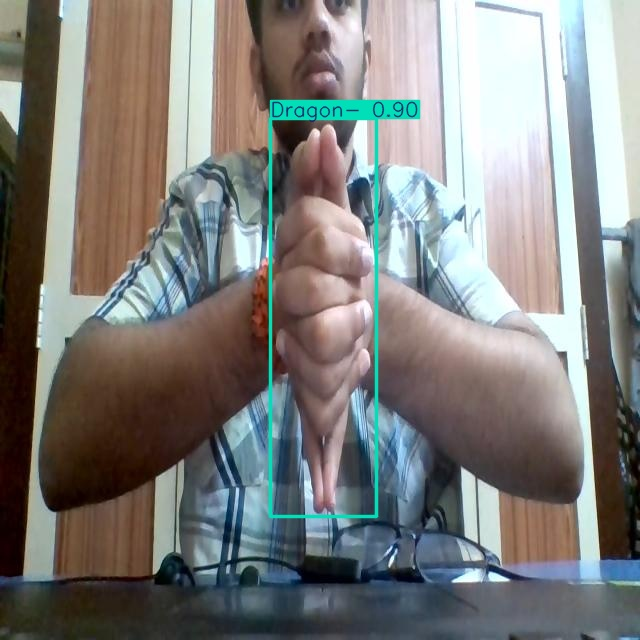

In [12]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")